In [1]:
import numpy as np
import math
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
import time
import glob,os
import cv2
import scipy.io as sio
from scipy import signal

In [33]:
# Align diffraction patterns inside this region using blank scan
rx = 50
ry = 78

path = '/srv/home/chenyu/DEbackup/110319/S2/'
dataset = np.zeros((ry,rx,300,300))
PACBED = np.zeros((1024,1024))
for irow in range(ry):
    for icol in range(rx):
        nSample = irow * rx + icol + 1;
        Sample = np.load(path+'npy/S2_'+format(nSample,'05')+'.npy')
        Sample[Sample<0] = 0
        PACBED = PACBED + Sample
        resized = cv2.resize(Sample, (300,300), interpolation = cv2.INTER_AREA)
        dataset[irow,icol,:,:] = np.sqrt(resized)

In [27]:
import csv

file_HAADF = [image for image in os.listdir(path) if '_Preview' in image]
file_HAADF = file_HAADF[0]
with open(path +  file_HAADF) as csvfile:
    file=csv.reader(open(path+file_HAADF,'r'))
    n=[]
    for row in file:
        n.append(row)

HAADFarray = np.transpose(np.asarray(n))
HAADFarray = np.squeeze(HAADFarray)
HAADFarray = HAADFarray.astype(np.float)
HAADFarray = np.reshape(HAADFarray,(rx,ry))
plt.imshow(HAADFarray)

In [34]:
%matplotlib notebook
import hyperspy.api as hs
s = hs.signals.Signal2D(data=dataset)

<IPython.core.display.Javascript object>


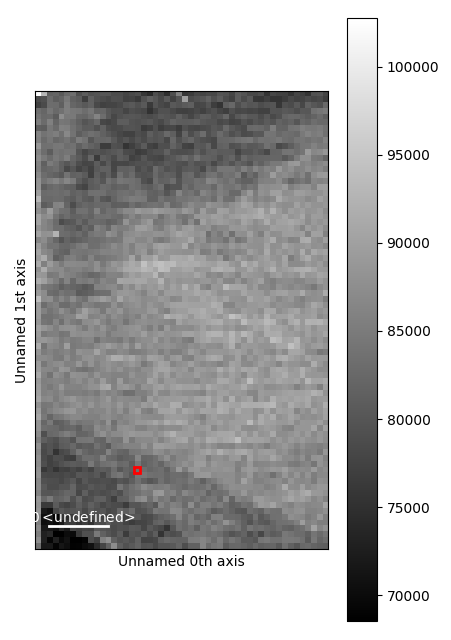

<IPython.core.display.Javascript object>


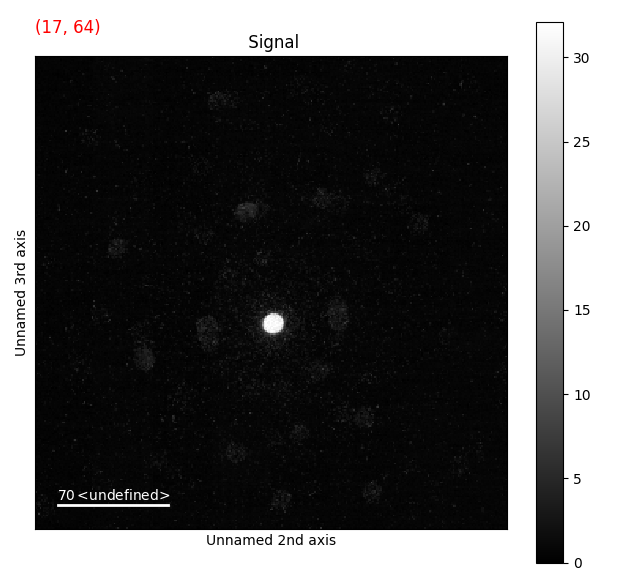

In [57]:
s.plot()

In [52]:
# Align diffraction patterns inside this region using blank scan
rx = 50
ry = 78

x_start = 7
x_end = 22
y_start = 65
y_end = 74

path = '/srv/home/chenyu/DEbackup/110319/S2/'
PACBED = np.zeros((1024,1024))
for irow in range(y_start,y_end):
    for icol in range(x_start,x_end):
        nSample = irow * rx + icol + 1;
        Sample = np.load(path+'npy/S2_'+format(nSample,'05')+'.npy')
        Sample[Sample<5] = 0
        PACBED = PACBED + Sample

<IPython.core.display.Javascript object>


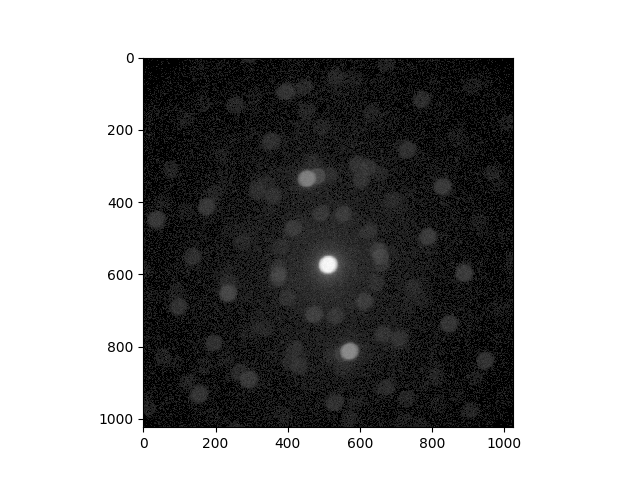

In [55]:
plt.imshow(np.sqrt(np.sqrt(PACBED)))